In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

We start off by setting parameters
- This code is translated from R

In [2]:
# Set parameters
T = 1  # time period
m = 100_000  # simulation times
premium = 0.03  # the extra risk premium
Int = 0.0012  # risk-free interest rate
Infl = 0.0316  # inflation rate
r1 = np.repeat(0.013, m)  # LIBOR rate
K = 1000  # face value of the CAT bond

# Generate cases for Magnitude and Depth
Mag1 = np.random.gumbel(4.71946946, 0.44861472, m)
Mag2 = np.random.gumbel(4.9275121, 0.4833782, m)
Depth1 = np.random.gamma(2.35378504, scale=1/0.25460951, size=m)
Depth2 = np.random.gamma(1.44878306, scale=1/0.14585340, size=m)

# Set arrays for payoff function values
C = np.full(m, np.nan)
f = np.full(m, np.nan)
g = np.full(m, np.nan)
h = np.full(m, np.nan)
p = np.full(m, np.nan)
q = np.full(m, np.nan)
s = np.full(m, np.nan)

# Threshold levels
aa, ab, ac, ad, ae, af = 2.6, 2.8, 1.6, 1.8, 0.5, 0.6
ba, bb, bc, bd, be, bf = 2.9, 3.0, 1.8, 2.0, 1.0, 1.1
ag, ah, ai, aj, ak = 0.8, 0.85, 0.55, 0.6, 0.2
bg, bh, bi, bj, bk = 0.95, 0.98, 0.7, 0.75, 0.5

Price payoff function PCAT

In [6]:
for i in range(m):
    if Mag1[i] > Mag2[i]:
        f[i]  # this line seems redundant, not sure if intended in the original code
    if Mag1[i] < 5.4:
        if Depth1[i] <= 20:
            f[i] = -aa * r1[i]
        if Depth1[i] > 20:
            f[i] = -ab * r1[i]
        C[i] = K * (1 + f[i])
    if 5.4 <= Mag1[i] < 5.8:
        if Depth1[i] <= 15:
            g[i] = -ac * r1[i]
        if Depth1[i] > 15:
            g[i] = -ad * r1[i]
        C[i] = K * (1 + g[i])
    if 5.8 <= Mag1[i] < 6.2:
        if Depth1[i] <= 10:
            h[i] = -ae * r1[i]
        if Depth1[i] > 10:
            h[i] = -af * r1[i]
    if Mag1[i] < 6.2:
        C[i] = K * (1 + h[i])  # Assuming this was intended to be (1 + h[i]) and not (1 + h[i]) * g
    if 6.2 <= Mag1[i] < 6.6:
        C[i] = K
    if 6.6 <= Mag1[i] < 7.0:
        if Depth1[i] <= 10:
            p[i] = -ag * K
        if Depth1[i] > 10:
            p[i] = -ah * K
        C[i] = p[i]
    if 7.0 <= Mag1[i] < 7.4:
        if Depth1[i] <= 10:
            q[i] = -ai * K
        if Depth1[i] > 10:
            q[i] = -aj * K
        C[i] = q[i]
    if Mag1[i] >= 7.4:
        s[i] = -ak * K
        C[i] = s[i]
    else:
        if Mag2[i] < 5.4:
            if Depth2[i] <= 20:
                f[i] = -ba * r1[i]
            if Depth2[i] > 20:
                f[i] = -bb * r1[i]
            C[i] = K * (1 + f[i])  # Assuming this was intended to be (1 + f[i]) and not (1 + f[i]) * g
        if 5.4 <= Mag2[i] < 5.8:
            if Depth2[i] <= 15:
                g[i] = -bc * r1[i]
            if Depth2[i] > 15:
                g[i] = -bd * r1[i]
            C[i] = K * (1 + g[i])  # Assuming this was intended to be (1 + g[i]) and not (1 + g[i]) * g
        if Mag2[i] < 6.2:
            if Depth2[i] <= 10:
                h[i] = -be * r1[i]
            if Depth2[i] > 10:
                h[i] = -bf * r1[i]
            C[i] = K * (1 + h[i])  # Assuming this was intended to be (1 + h[i]) and not (1 + h[i]) * g
        if 5.8 <= Mag2[i] < 6.2:
            C[i] = K
        if 6.2 <= Mag2[i] < 6.6:
            if Depth2[i] <= 10:
                p[i] = -bg * K
            if Depth2[i] > 10:
                p[i] = -bh * K
            C[i] = p[i]
        if 6.6 <= Mag2[i] < 7.0:
            if Depth2[i] <= 10:
                q[i] = -bi * K
            if Depth2[i] > 10:
                q[i] = -bj * K
            C[i] = q[i]
        if Mag2[i] >= 7.4:
            s[i] = -bk * K
            C[i] = s[i]
        g[i] = None  # this line seems to be present in the R code but has no equivalent action in Python


In [7]:
# Calculate discount factor
discount = (1 + Infl) * (1 + premium + Int)

# Calculate the present value of the CAT bond
P = C / discount

# Calculate the mean of P (final price of the CAT bond)
mean_P = np.mean(P)


In [8]:
mean_P

nan

# experimenting

In [15]:
# Define parameters
c1 = 0.05866229  # Shape parameter
loc1 = 0.4833782  # Location parameter
scale1 = 4.71946946  # Scale parameter

c2 = 0.1181457  # Shape parameter
loc2 = 0.4833782  # Location parameter
scale2 = 4.9275121  # Scale parameter

# Create a frozen GEV distribution object
gev_dist1 = stats.genextreme(c1, loc1, scale1)
gev_dist2 = stats.genextreme(c2, loc2, scale2)

# Calculate PDF and CDF at specific points
#x = np.linspace(-5, 5, 1000)
#pdf_values = gev_dist.pdf(x)
#cdf_values = gev_dist.cdf(x)

# Generate random variates
Mag1 = random_variates1 = gev_dist1.rvs(size=100_000)
Mag2 = random_variates2 = gev_dist2.rvs(size=100_000)

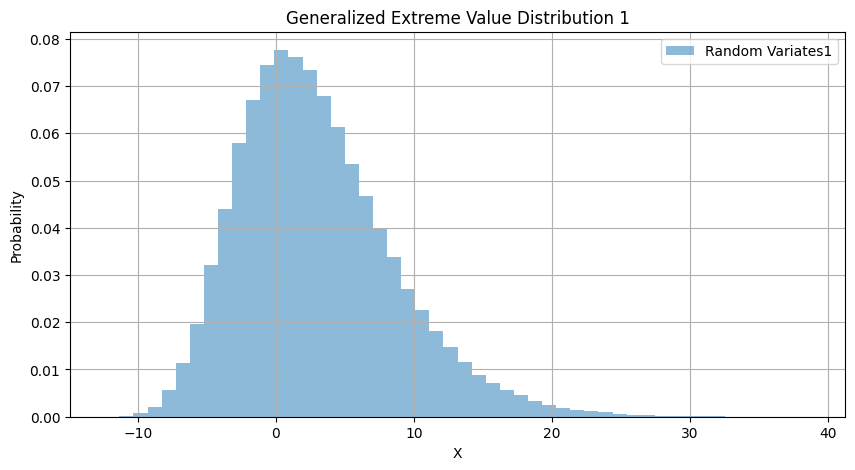

In [16]:
# Plot
plt.figure(figsize=(10, 5))
#plt.plot(x, pdf_values, label='PDF')
#plt.plot(x, cdf_values, label='CDF')
plt.hist(Mag1, bins=50, density=True, alpha=0.5, label='Random Variates1')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Generalized Extreme Value Distribution 1')
plt.legend()
plt.grid(True)
plt.show()

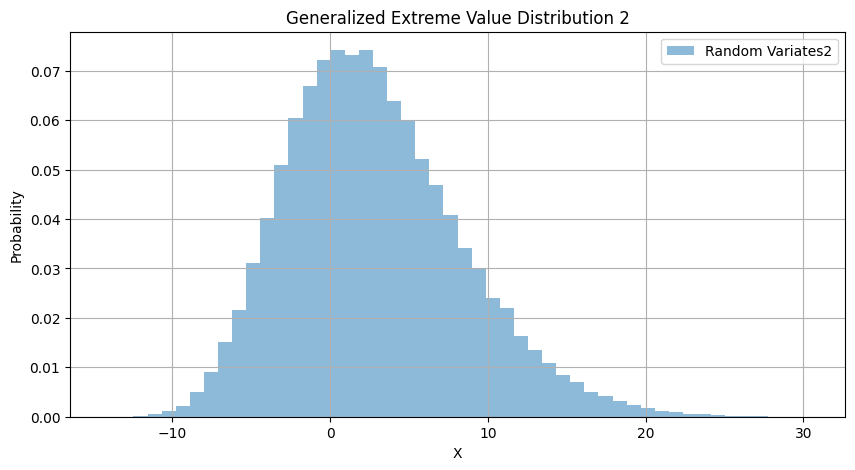

In [17]:
# Plot
plt.figure(figsize=(10, 5))
#plt.plot(x, pdf_values, label='PDF')
#plt.plot(x, cdf_values, label='CDF')
plt.hist(Mag2, bins=50, density=True, alpha=0.5, label='Random Variates2')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Generalized Extreme Value Distribution 2')
plt.legend()
plt.grid(True)
plt.show()